<a href="https://colab.research.google.com/github/valixonov04/small_projects/blob/main/Teri_kasaligini_aniqlaydigon_dastur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teri kasaligini 10 turi bo'yicha klassifikatsiya qilib beradi ! :)

In [1]:
!pip install fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import fastai
import torch

print(torch.__version__)
print(fastai.__version__)

2.6.0+cu124
2.7.19


##Dataset

**Biz kaggledan datani yuklab olamiz !**

In [3]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("ismailpromus/skin-diseases-image-dataset")
print("Path to dataset files:", path)

100%|██████████| 5.19G/5.19G [04:00<00:00, 23.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ismailpromus/skin-diseases-image-dataset/versions/1


In [4]:
from fastai.vision.all import *
from ipywidgets import widget


In [5]:
fls = get_image_files(path)
fls

(#27153) [Path('/root/.cache/kagglehub/datasets/ismailpromus/skin-diseases-image-dataset/versions/1/IMG_CLASSES/5. Melanocytic Nevi (NV) - 7970/ISIC_0032189.jpg'),Path('/root/.cache/kagglehub/datasets/ismailpromus/skin-diseases-image-dataset/versions/1/IMG_CLASSES/5. Melanocytic Nevi (NV) - 7970/ISIC_0031752.jpg'),Path('/root/.cache/kagglehub/datasets/ismailpromus/skin-diseases-image-dataset/versions/1/IMG_CLASSES/5. Melanocytic Nevi (NV) - 7970/ISIC_0010201.jpg'),Path('/root/.cache/kagglehub/datasets/ismailpromus/skin-diseases-image-dataset/versions/1/IMG_CLASSES/5. Melanocytic Nevi (NV) - 7970/ISIC_0027600.jpg'),Path('/root/.cache/kagglehub/datasets/ismailpromus/skin-diseases-image-dataset/versions/1/IMG_CLASSES/5. Melanocytic Nevi (NV) - 7970/ISIC_0030568.jpg'),Path('/root/.cache/kagglehub/datasets/ismailpromus/skin-diseases-image-dataset/versions/1/IMG_CLASSES/5. Melanocytic Nevi (NV) - 7970/ISIC_0008294_downsampled.jpg'),Path('/root/.cache/kagglehub/datasets/ismailpromus/skin-dise

In [7]:
SKIN_DISEASES = [
    "Egzema",  # Eczema
    "Suyallar, Molluskum va boshqa virusli infeksiyalar",  # Warts Molluscum and other Viral Infections
    "Melanoma",  # Melanoma (o‘zbek tilida o‘z holicha ishlatiladi)
    "Atopik dermatit",  # Atopic Dermatitis
    "Bazal hujayrali karsinoma (BCC)",  # Basal Cell Carcinoma (BCC)
    "Melanositik nevus (NV)",  # Melanocytic Nevi (NV)
    "Yaxshi tabiatli keratozga o‘xshash lezyonlar (BKL)",  # Benign Keratosis-like Lesions (BKL)
    "Psoriaz/Lixen planus",  # Psoriasis/Lichen Planus
    "Seboreik keratozlar va boshqa yaxshi tabiatli o‘smalar",  # Seborrheic Keratoses and other Benign Tumors
    "Tinea (qurt kasalligi), Kandidoz"  # Tinea Ringworm Candidiasis
]

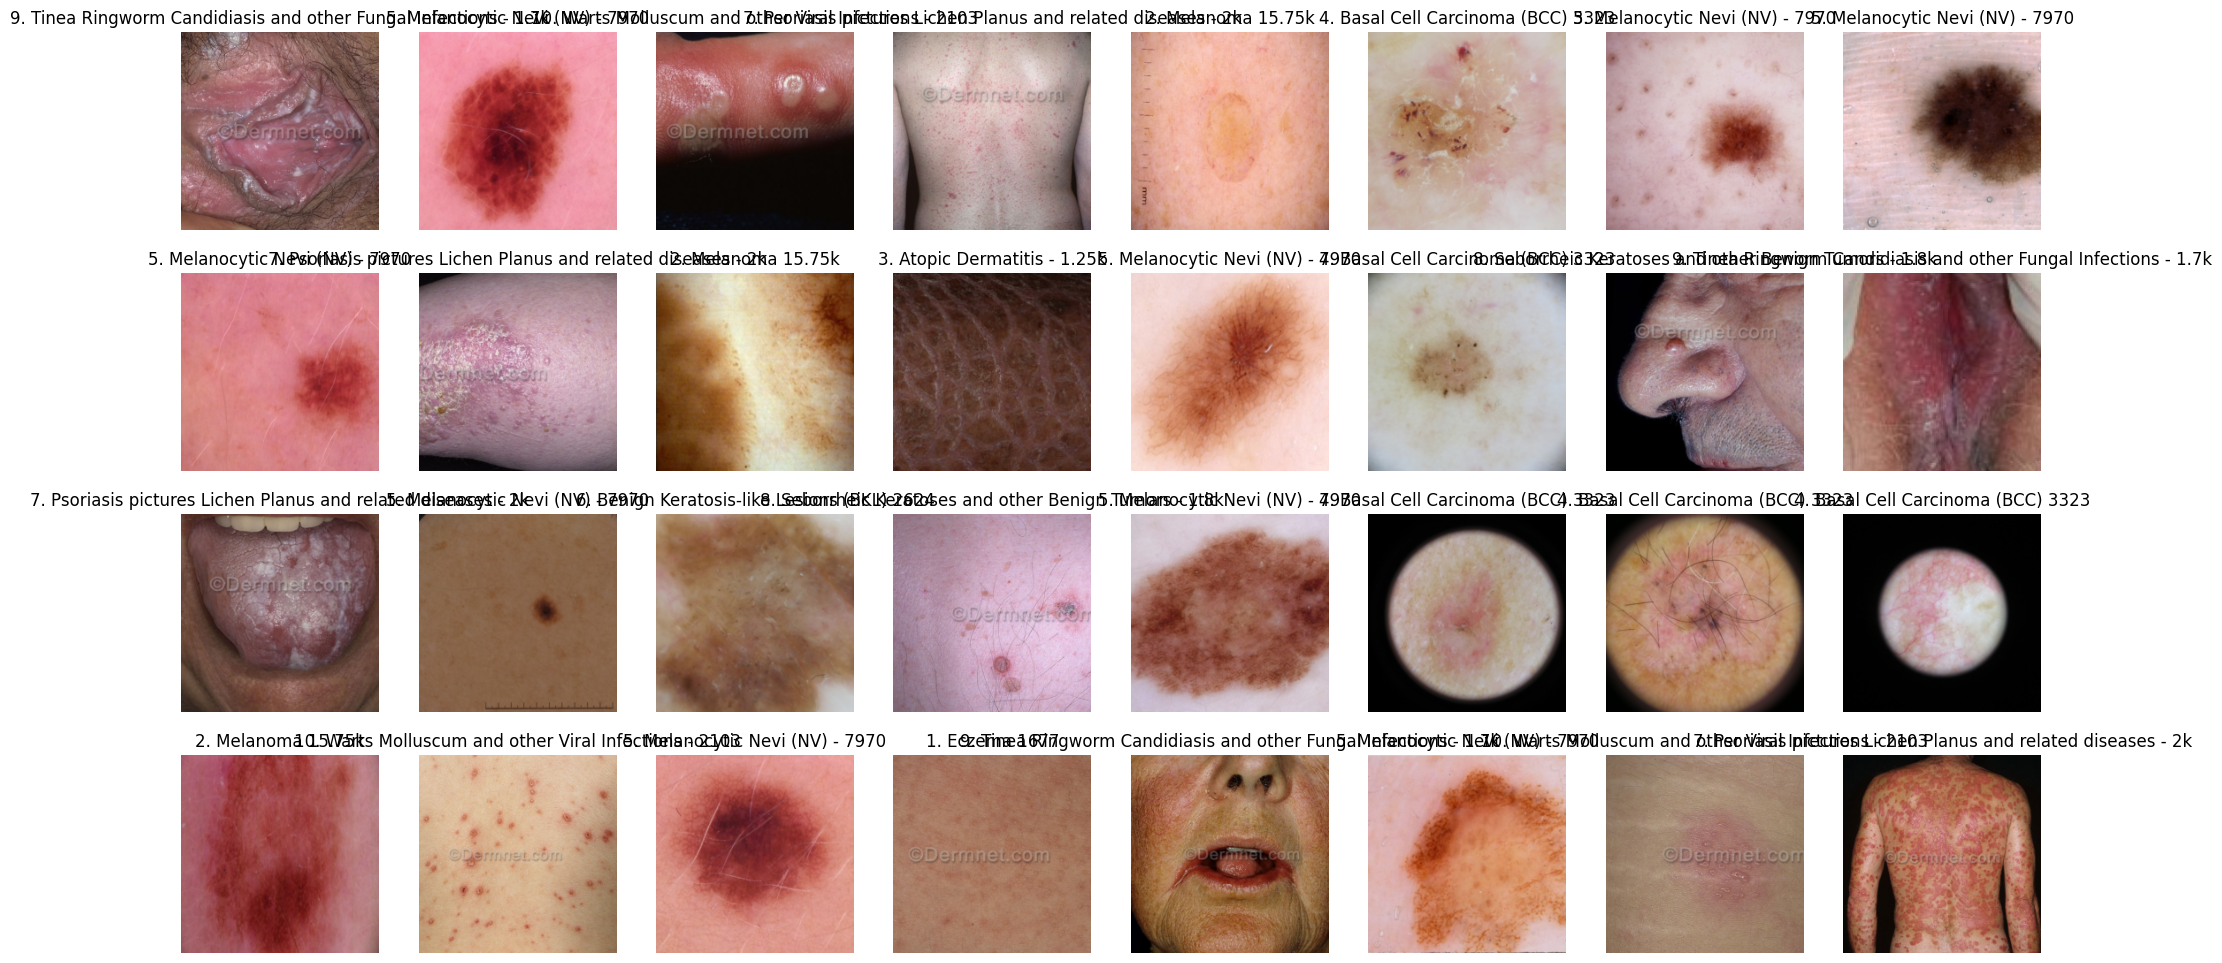

In [11]:
#data block

skin_diseases = DataBlock(
    blocks = (ImageBlock , CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed = 42),
    get_y =parent_label,
    item_tfms=Resize(224)

)

#Dataloader
dls = skin_diseases.dataloaders(path)

dls.train.show_batch(max_n = 32 ,nrows = 4)

In [12]:
#train
learn = cnn_learner(dls, resnet34 , metrics=accuracy)
learn.fine_tune(5)

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 204MB/s]


/usr/local/lib/python3.11/dist-packages/fastai/interpret.py:151: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


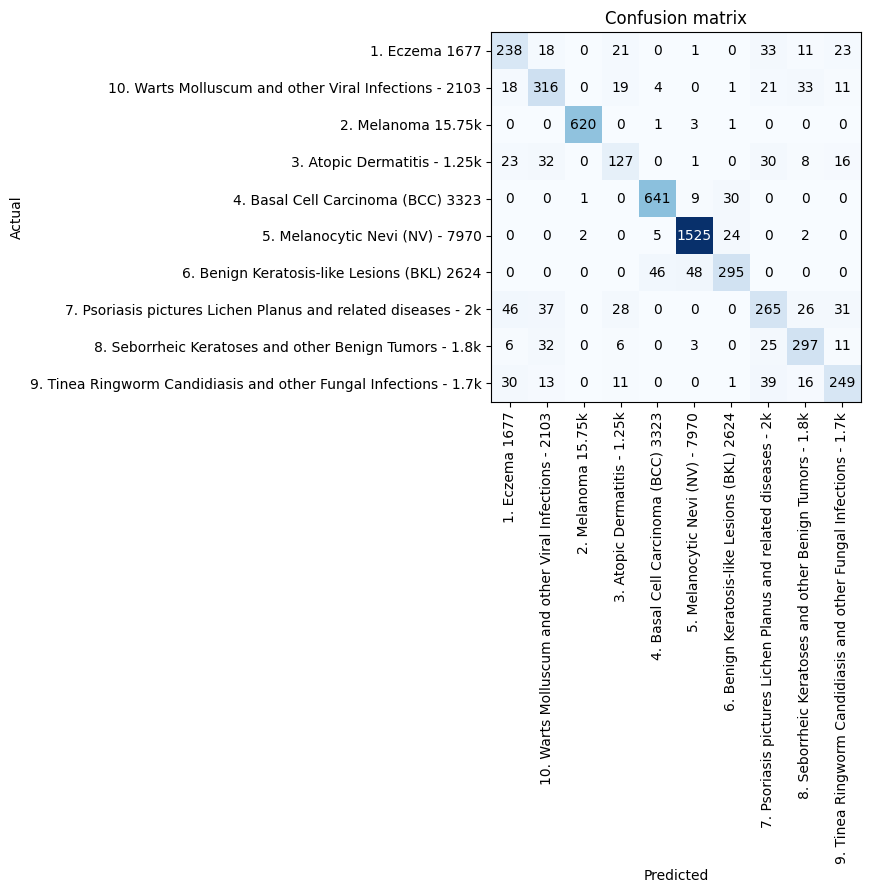

In [13]:
 #tekshirish
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

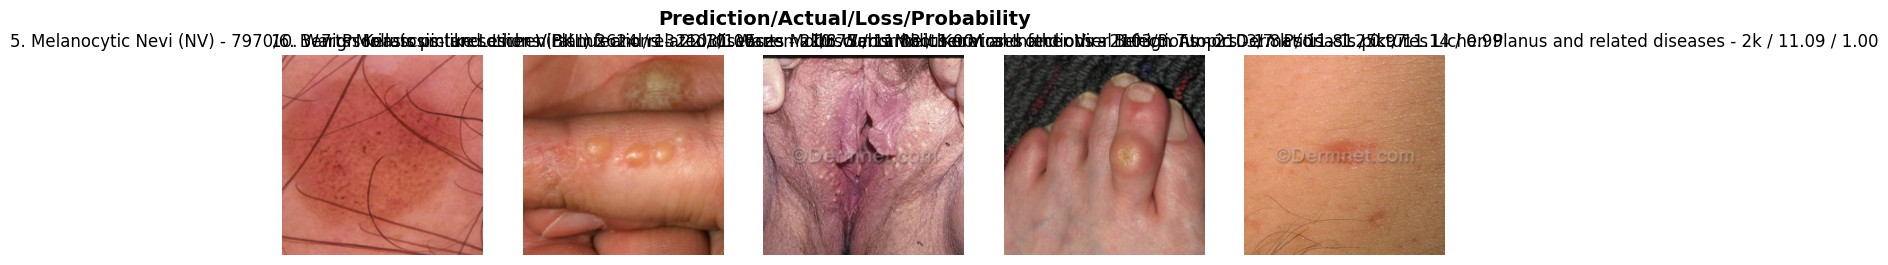

In [15]:
interp.plot_top_losses(5,nrows=1)

In [16]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.9 MB/s eta 0:00:00


In [17]:
from ipywidgets import widgets
from IPython.display import display

upload = widgets.FileUpload()
display(upload)


FileUpload(value={}, description='Upload')

bashorat:6. Benign Keratosis-like Lesions (BKL) 2624
Ehtimolik:0.997


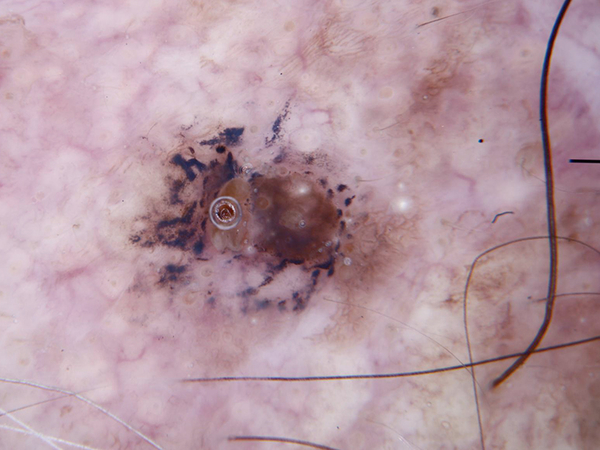

In [18]:
img =PILImage.create(upload.data[-1])
pred,pred_id ,probs = learn.predict(img)
print(f'bashorat:{pred}')
print(f'Ehtimolik:{probs[pred_id]:.3f}')
img

In [19]:
#save
learn.export("teri_kasaligi.pkl")

In [21]:
model = load_learner("/content/teri_kasaligi.pkl")

In [22]:
model.predict(img)

('6. Benign Keratosis-like Lesions (BKL) 2624',
 tensor(6),
 tensor([2.4474e-05, 2.2500e-06, 4.2164e-06, 1.0551e-06, 2.5437e-03, 2.6182e-04,
         9.9704e-01, 9.3688e-07, 1.0601e-04, 1.8154e-05]))